In [1]:
import os
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

import torch
from torchvision import transforms
from torch.utils.data import DataLoader

from data_generator.prop_generator import write_props_json
from blender_scripts.blender_launcher import launch_blender

from parameters import BATCH_SIZE, train_dir, val_dir, test_dir
from parameters import TRAINING_SET_SIZE, VALIDATION_SET_SIZE, TEST_SET_SIZE
from parameters import render_data_script, state_dict_path, state_dict_dir
from parameters import device
from custom_nn.custom_nn import Net, image_dataset

from custom_nn.target_loader import target_loader
from custom_nn.train import train
from custom_nn.test import test
from utils.utils import compare_images, load_from_dir, select_image_dir


ModuleNotFoundError: No module named 'MLApp'

In [ ]:
print(os.getcwd())
skybox_list = os.listdir("blender_files\Backgrounds")
skybox_list[0]

In [ ]:
skybox_list

In [ ]:
for i, sky in enumerate(skybox_list):
    print(i, sky)

In [ ]:


state_dict_path = ""
while True:
    try:
        state_dict_path = skybox_list[int(input("Which state dict did you want to load?"))]
        break
    except:
        print("Invalid option, please try again")
print("skybox_path set to: " + state_dict_path)        

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])


val_targets=target_loader(val_dir) 
val_data_set = image_dataset('data\\test\\renders',val_targets,transform=transform)
#subset_val = [val_data_set[i] for i in range(10)]
#print(f"{val_data_set[:10]=}")
#val_data_loader = DataLoader(subset_val, batch_size=1, shuffle=False)

In [ ]:
model = Net()
model.to(device)
model.load_state_dict(torch.load(state_dict_path))

In [ ]:
val_sub_set = val_data_set[:10]

In [ ]:
val_sub_set_loader = DataLoader(val_sub_set, batch_size=1, shuffle=False)

In [ ]:
b = [a for a in enumerate(val_sub_set_loader)]
   

In [ ]:
predictions = test(model, val_sub_set_loader)

In [ ]:
predictions

In [ ]:
write_props_json("data\\val\\pred",predictions)

In [ ]:
launch_blender(data=val_dir+"\\pred", script=render_data_script)

In [ ]:
def numpy_max_min(image):
    #image = image.cpu().numpy().transpose((1,2,0))
    return ((image - image.min()) / (image.max() - image.min()))

In [ ]:
def numpy_max_min(image):
    #image = image.cpu().numpy().transpose((1,2,0))
    return ((image - image.min()) / (image.max() - image.min()))

In [ ]:
pred_render_paths = os.listdir(val_dir+"\\pred\\renders")

In [ ]:
pred_render_imgs = []
for image_file in pred_render_paths:
    pred_render_imgs.append(mpimg.imread(os.path.join(val_dir+"\\pr=ed\\renders",image_file)))

In [ ]:
dir_list = {}
with os.scandir(val_dir+"\\pred\\renders") as dir_contents:
    for ind, entry in enumerate(dir_contents):
        if entry.is_dir():
            dir_list.update({ind : entry.name})
selection = int(input(f'Which dir would you like to chose? {dir_list}'))
selected_dir = dir_list[selection]
selected_dir

In [ ]:
val_sub_set[0][0].cpu()

In [ ]:
fig, axes = plt.subplots(len(pred_render_imgs), 2, figsize=(10, 2 * len(pred_render_imgs)))

for i in range(len(pred_render_imgs)):
    axes[i, 0].imshow(numpy_max_min_tf(val_sub_set[i][0]), aspect='equal')
    axes[i, 0].set_title("X")
    axes[i, 0].axis("off")

    axes[i, 1].imshow(numpy_max_min(pred_render_imgs[i]), aspect='equal')
    axes[i, 1].set_title("Y")
    axes[i, 1].axis("off")

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

#train_targets = target_loader(train_dir)
#train_data_set = image_dataset('data\\train\\renders',train_targets,transform=transform)
#train_data_loader = DataLoader(train_data_set, batch_size=BATCH_SIZE, shuffle=True)

val_targets=target_loader(val_dir) 
val_data_set = image_dataset('data\\test\\renders',val_targets,transform=transform)
#val_data_loader = DataLoader(val_data_set, batch_size=1, shuffle=False)

# load neural net, define loss and optimizer

model = Net()
model.to(device)
model.load_state_dict(torch.load(state_dict_path))


# train nn on train props

#train(model, data_loader=train_data_loader)

# test nn on test props
val_sub_set = val_data_set[:10]
val_sub_set_loader = DataLoader(val_sub_set, batch_size=1, shuffle=False)

val_sub_set_predictions = test(model, val_sub_set_loader)
write_props_json("data\\val\\pred",val_sub_set_predictions)
launch_blender(data=val_dir+"\\pred", script=render_data_script)

pred_render_dir = select_image_dir(val_dir+"\\pred\\renders")
#pred_render_paths = os.listdir(render_dir)


In [ ]:
print(f"{pred_render_dir}")

In [ ]:
pred_render_images = load_from_dir(pred_render_dir)

In [ ]:
compare_images(pred_render_images,val_sub_set)


In [1]:
import torch
import PIL
from PIL import Image
import os
from torch import nn
from torchvision import transforms

In [2]:
image = PIL.Image.open("data/training_datasets/820990fd/10-06-2025-1227-47/train/0df6b64b.jpg")

In [93]:
c1 = nn.Conv2d(in_channels=3, out_channels=16,kernel_size=3, padding=1)
c2 = nn.Conv2d(in_channels=16, out_channels=32,kernel_size=3, padding=1) 
p = p = nn.MaxPool2d(kernel_size=2, stride=2)
lin1 = nn.Linear(in_features=500000, out_features=128)
lin2 = nn.Linear(in_features=128, out_features=64)
lin3 = nn.Linear(in_features=64, out_features=6)
transform = transforms.Compose(
        [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
tim = transform(image).unsqueeze(0)
def flatten(x):
    return x.view(x.size(0), -1)  

In [105]:
tim = torch.rand([1,3,500,500])

In [106]:
c1.weight.shape

torch.Size([16, 3, 3, 3])

In [107]:
tim.shape


torch.Size([1, 3, 500, 500])

In [108]:
c1o = c1(tim)
c1o.shape

torch.Size([1, 16, 500, 500])

In [109]:
c1po = p(c1o)
c1po.shape

torch.Size([1, 16, 250, 250])

In [110]:
c2.weight.shape

torch.Size([32, 16, 3, 3])

In [111]:
c2o = c2(c1po)
c2o.shape

torch.Size([1, 32, 250, 250])

In [117]:
c2po = p(c2o)
c2po.shape

torch.Size([1, 32, 125, 125])

In [118]:
flat_c2po = flatten(c2po)
flat_c2po.shape

torch.Size([1, 500000])

In [119]:
flat_c2po.shape[1]

500000

In [7]:
from torchvision.transforms.functional import to_pil_image


In [8]:
feature = co[0]

In [9]:
feature_min = feature.min()
feature_max = feature.max()
normalized = (feature - feature_min) / (feature_max - feature_min)

In [10]:
img = to_pil_image(normalized)

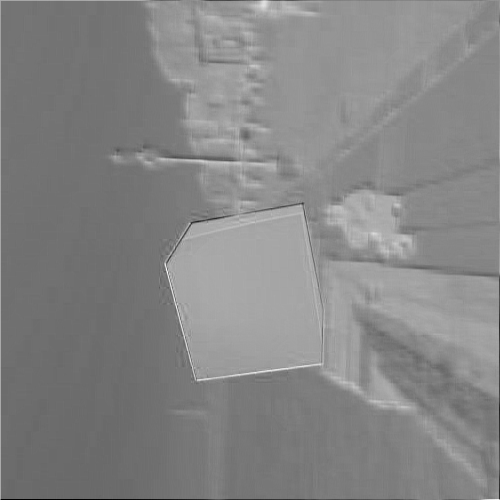

In [11]:
img

In [17]:
c.weight.shape

torch.Size([16, 3, 3, 3])

In [23]:
kernel = c2.weight[0]

In [24]:
kernel_min = kernel.min()
kernel_max = kernel.max()
normalized = (kernel - kernel_min) / (kernel_max - kernel_min)

In [25]:
img = to_pil_image(normalized)

ValueError: pic should not have > 4 channels. Got 16 channels.

In [26]:
img